In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

# Training the model on the MNIST dataset

In [4]:
tf.random.set_seed(42)

In [5]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
(X_train, y_train), (X_test, y_test) = hand

In [8]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

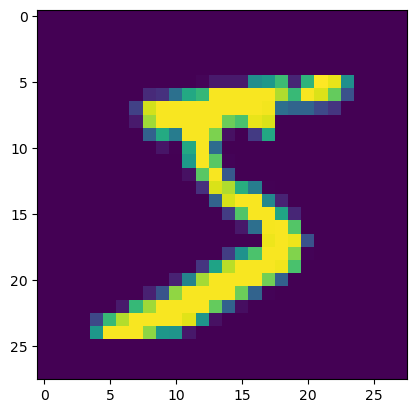

In [12]:
plt.imshow(X_train[0])

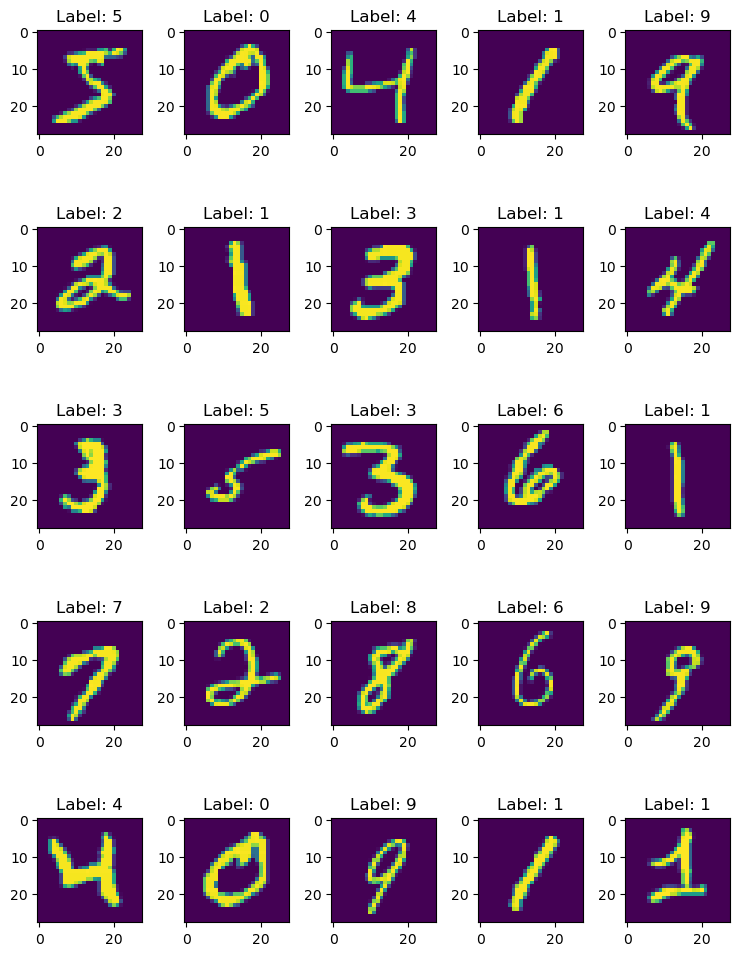

In [13]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [14]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
X_train /= 255
X_test /= 255

In [19]:
# 6. Preprocess class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [24]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8757 - loss: 0.3996
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9734 - loss: 0.0927
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9800 - loss: 0.0650
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9829 - loss: 0.0548
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9838 - loss: 0.0490
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9866 - loss: 0.0418
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9884 - loss: 0.0375
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9891 - loss: 0.0341
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9898 - loss: 0.0322
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9909 - loss: 0.0280


In [26]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9928 - loss: 0.0266


In [27]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1.6682688e-17, 2.6195969e-11, 5.7021374e-11, 2.6458050e-10,
        4.3787941e-13, 3.2254411e-16, 4.4508896e-21, 1.0000000e+00,
        1.9127703e-14, 6.9065984e-09],
       [1.7788531e-17, 4.6023857e-12, 1.0000000e+00, 2.8163583e-18,
        2.3448258e-15, 1.4422386e-21, 5.2692656e-17, 1.7484450e-16,
        3.6676988e-15, 3.1095014e-19],
       [8.7248622e-13, 9.9999976e-01, 5.1618620e-09, 3.8375692e-11,
        1.6896088e-07, 1.3136975e-08, 7.4807129e-09, 1.7777548e-08,
        3.0442120e-09, 4.8963777e-10],
       [9.9999893e-01, 9.7899191e-09, 2.5988006e-08, 2.5619307e-10,
        4.6471139e-11, 5.9337846e-10, 8.7033658e-07, 4.3023874e-08,
        1.3037491e-08, 1.0239865e-08]], dtype=float32)

In [28]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([1.        , 1.        , 0.99999994, 0.9999998 ], dtype=float32)

In [29]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [30]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 976    0    0    0    0    0    1    0    2    1]
 [   0 1132    1    0    0    1    0    1    0    0]
 [   1    0 1026    0    1    0    0    4    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   1    0    0    0  974    0    1    0    2    4]
 [   0    0    0    3    0  888    1    0    0    0]
 [   4    2    0    0    1    3  946    0    2    0]
 [   0    2    6    1    0    0    0 1017    1    1]
 [   1    0    2    1    0    0    0    0  968    2]
 [   1    0    1    1    2    2    0    1    4  997]]


# Testing model on my handwritten numbers

In [31]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Achievement 2'

In [32]:
# Check an image example

img = Image.open(os.path.join(path, 'Prepared Handwritten Numbers', '0.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1291, 1821)
L


In [33]:
# Define the list of numbers (0-9) for the labels
labels = list(range(10))

# Initialize lists to store the image data and labels
images = []
image_labels = []

# Loop through all numbers (0-9) and load corresponding images
for label in labels:
    # Open the image
    img_path = os.path.join(path, 'Prepared Handwritten Numbers', f'{label}.jpg')
    img = Image.open(img_path)
    
    # Convert the image to grayscale (one single channel)
    img = img.convert('L')
    
    # Resize the image to 28x28
    newsize = (28, 28)
    img_resized = img.resize(newsize)
    
    # Convert the image to a numpy array
    img_array = np.asarray(img_resized)
    
    # Normalize the image data to the range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to match the CNN input format: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    # Append the processed image and label to the respective lists
    images.append(img_array)
    image_labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# One-hot encode the labels for CNN training
image_labels = to_categorical(image_labels, num_classes=10)

# Check the shapes of the images and labels
print("Images shape:", images.shape)  # Should be (10, 28, 28, 1) for 10 images
                                      # each resized to 28x28 and with 1 channel (grayscale)
print("Labels shape:", image_labels.shape)  # Should be (10, 10) for 10 images 
                                            #with 10 possible class labels (0-9)

Images shape: (10, 28, 28, 1)
Labels shape: (10, 10)


In [34]:
# Rename arrays

X_real_test = images  # Your preprocessed handwritten images
y_real_test = labels  # The true labels (0-9) for your handwritten images

In [35]:
# Run the model's predictions on the handwritten data
predictions = model.predict(X_real_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [36]:
# Get the predicted class (the index of the maximum value in the output array)

predicted_labels = np.argmax(predictions, axis=1)

In [37]:
# Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_real_test, predicted_labels)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 40.00%


In [38]:
# Display the predicted and true labels

for i, (pred, actual) in enumerate(zip(predicted_labels, y_real_test)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 2, Actual = 0
Image 1: Predicted = 2, Actual = 1
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 3, Actual = 3
Image 4: Predicted = 5, Actual = 4
Image 5: Predicted = 5, Actual = 5
Image 6: Predicted = 9, Actual = 6
Image 7: Predicted = 8, Actual = 7
Image 8: Predicted = 8, Actual = 8
Image 9: Predicted = 2, Actual = 9
